In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import normalize
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
y_train = df_train[['SalePrice']]
y_train = y_train.fillna(y_train.mean()).values.ravel()
y_train = np.log1p(y_train)

In [4]:

X_train = df_train.drop(['Id', 'SalePrice'], axis=1)
X_test = df_test.drop(['Id'], axis=1)
X_all = pd.concat([X_train, X_test], axis=0)

X_all_cat = X_all.select_dtypes(include=['object'])
X_all_num = X_all.select_dtypes(exclude=['object'])

#create dummy variables for categorical variables
X_all_cat = pd.get_dummies(X_all_cat)

#impute missing values
X_all_cat = X_all_cat.fillna(X_all_cat.mean())
X_all_num = X_all_num.fillna(X_all_num.mean())

#concatenate variables
X_all = pd.concat([X_all_cat, X_all_num], axis=1)

#split again between train and test
X_train = X_all[:df_train.shape[0]]
X_test = X_all[df_train.shape[0]:]

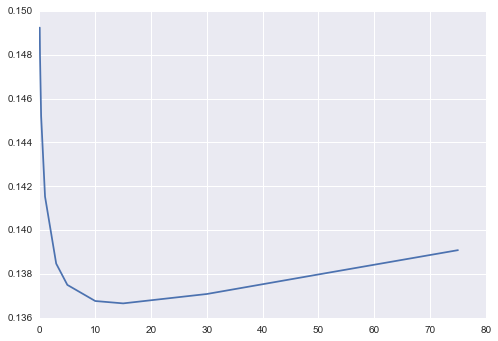

In [9]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]

models = [Ridge(random_state=0, alpha=a) for a in alphas]

rmses = [np.sqrt(-cross_val_score(model, X_train, y_train, 
                               cv=10, scoring='neg_mean_squared_error')) 
         for model in models]

plt.plot(alphas, [rmse.mean() for rmse in rmses])

In [11]:
model = Ridge(random_state=0, alpha=15)
model.fit(X_train, y_train)
yhat = model.predict(X_test)

In [12]:
submission = pd.DataFrame()
submission['Id'] = df_test['Id']
submission['SalePrice'] = np.exp(yhat) - 1

In [13]:
submission.to_csv('ridge_regression_submission.csv',  index=False)